In [12]:
from functools import reduce
from itertools import combinations
import numpy as np
def Lk(list_xy,k):
    list_x=[str(i[0]) for i in list_xy]
    den=1; coef=[]
    for i in range (len(list_xy)):
        if i!=k:#denominator
            den*=(list_xy[k][0]-list_xy[i][0])
        if i>0:#numerator
            comb=list_x[:k]
            if k!=len(list_xy)-1:
                comb.extend(list_x[k+1:])
            comb=list(combinations(','.join(comb).split(','), i))
            comb=[reduce(lambda x,y:(int(x)*int(y)), comb[j]) for j in range (len(comb))] if i!=1 else [int(x[0]) for x in comb]
            coef.insert(0,sum(comb))
    coef.append(1)
    coef=coef[::-1]
    coef=[coef[i]/den*(-1)**(i)*list_xy[k][1] for i in range (len(coef))]
    return (coef[::-1])


In [13]:
def F(list_xy):
    ans=[]
    for i in Lk(list_xy, 0):
        ans.append(i)
    for k in range(1,len(list_xy)):
        for i in range(len(ans)):
            ans[i]+=Lk(list_xy,k)[i]
    return ans


In [31]:
list_x=list(map(int,input().split(',')))
list_y=list(map(float,input().split(',')))
lastofus=[[list_x[i], list_y[i]] for i in range(len(list_x))]
InterPol=F(lastofus)
print(InterPol)
ans=[[],[]]
k=53
ans[0]=np.linspace(list_x[0], list_x[-1], 300)
for x in ans[0]:
    #x=begin+length/k*i
    #ans[0].append(x)
    y=0
    for j in range(len(InterPol)):
        y += x**j*InterPol[j] 
    ans[1].append(y)
    

-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8
-1.45,-1.43,-1.41,-1.37,-1.33,-1.25,-1.11,-0.79,0,0.79,1.11,1.25,1.33,1.37,1.41,1.43,1.45
[0.0, 0.9225077422577421, 2.816045736441647e-17, -0.15089107169836327, 8.416966396865982e-18, 0.019820687836254954, -1.6125389733353743e-18, -0.0014999141512958062, -1.9476463830928568e-19, 6.40522425533999e-05, -2.4699613090833406e-21, -1.5147687746067317e-06, -3.8246763572920617e-22, 1.8370475546401477e-08, -4.3943970041879595e-25, -8.859239183313257e-11, -3.049420715222343e-26]


-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8
-1.45,-1.43,-1.41,-1.37,-1.33,-1.25,-1.11,-0.79,0,0.79,1.11,1.25,1.33,1.37,1.41,1.43,1.45

In [32]:
%matplotlib notebook


<IPython.core.display.Javascript object>


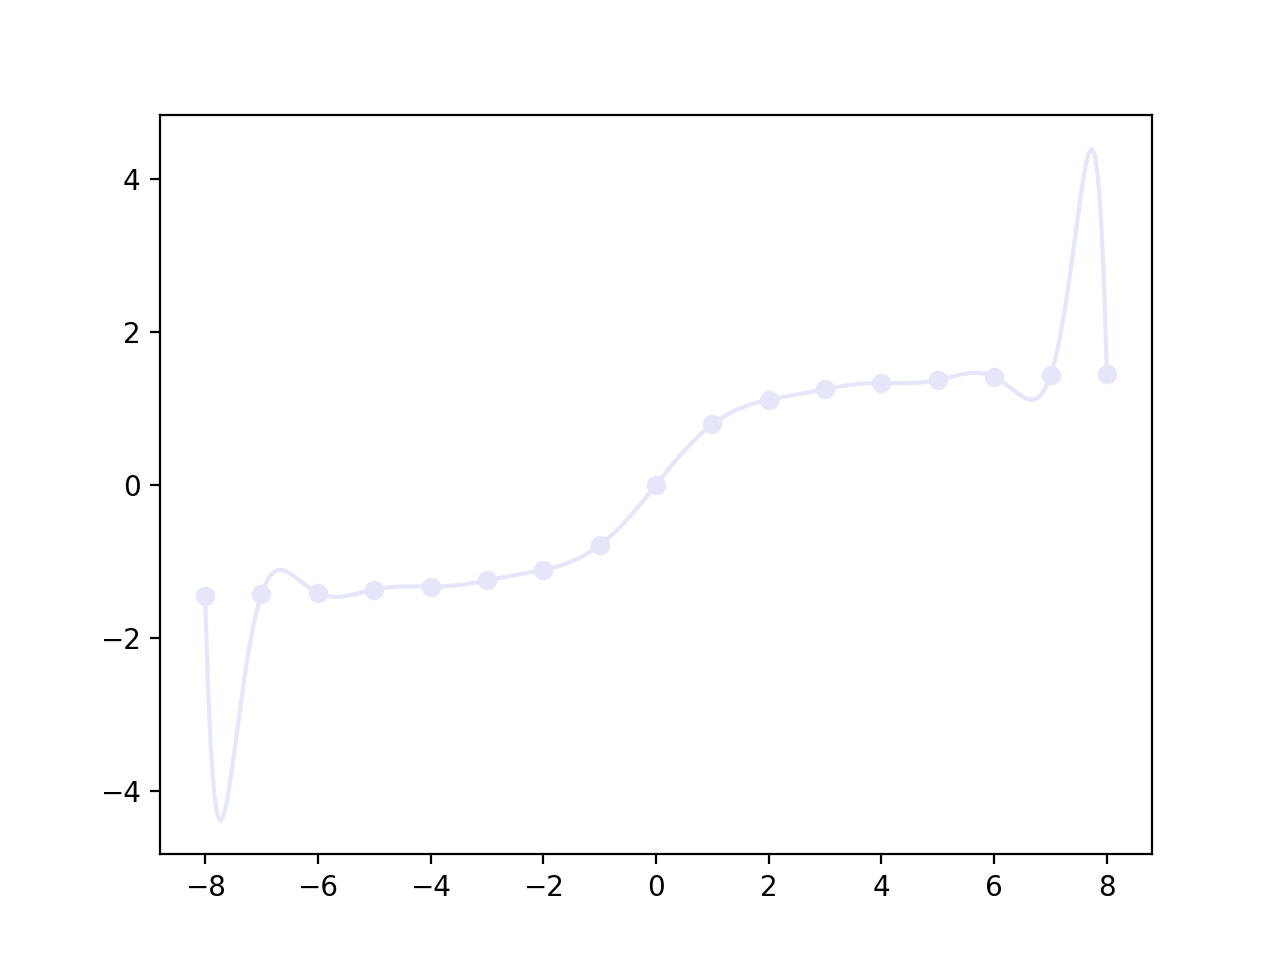

In [33]:
import matplotlib.pyplot as plt
plt.plot(list_x, list_y, 'o', ans[0],ans[1], '-', color='lavender')
plt.show()